 <h1>Imports</h1>

In [1]:
from math import exp

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import root


 <h1>Antonie Equestion</h1>

In [2]:


def Antonie(T, param):
    '''
    T : Temprature in Centigrade
    param: list of [A, B, C]

    This Function Computes saturated Pressure at given Temprature
    '''
    if len(param) != 3:
        raise Exception("param must be list of [A, B, C]")

    A = param[0]
    B = param[1]
    C = param[2]

    ln_P_sat = A - B/(T + C)
    P_sat = exp(ln_P_sat)

    return P_sat


 <h1>Bubble Pressure</h1>

In [3]:


def BUBL_P(X, T, all_params):
    '''
    X = list of mollar fractions of liquid like [0.2 ,0.8] or [0.1 0.2 0.7]
        Sumation of X list must be 1.0

    T = Temprature in Centigrade

    all_params = list of parameters for Antonie equations

    example for all params:
        all_params = [[A1, B1, C1],
                      [A2, B2, C2],
                      [A3, B3, C3]] 
    '''

    # checking function inputs to be correct
    if len(X) != len(all_params):
        raise Exception(
            "count of ellements of X and all_params must be equal!")

    if round(sum(X), 2) != 1.0:
        raise Exception("Summation of all X list must be 1.0")

    # Computing Pressure
    P = 0
    for i in range(len(X)):
        xi = X[i]
        param = all_params[i]  # [A, B, C]

        # Computing Saturated Pressureof i_th Component at Tempreture given with Antonie Equation
        P_sat_i = Antonie(T, param)

        # Computing the General Pressure with Raoult's law
        P += P_sat_i * xi

    # Computing Y mollar fractions of vapor
    Y = []
    for i in range(len(X)):
        xi = X[i]
        param = all_params[i]

        # Computing Saturated Pressureof i_th Component at Tempreture given with Antonie Equation
        P_sat_i = Antonie(T, param)

        # Computing i_th vapor mollar fraction with raoult's law
        yi = (xi * P_sat_i)/P
        Y.append(yi)

    # returning results
    return P, Y


 <h1>Bubble Temprature</h1>

In [4]:


def BUBL_T(X, P, all_params):
    """
    X = list of mollar fractions of liquid like [0.2 ,0.8] or [0.1 0.2 0.7]
        Sumation of X list must be 1.0

    P = Pressure in kPa

    all_params = list of parameters for Antonie equations

    example for all params:
        all_params = [[A1, B1, C1],
                      [A2, B2, C2],
                      [A3, B3, C3]]
    """
    # creating root finding function
    def func(T):
        return (P - BUBL_P(X, T, all_params)[0])

    # solving and finding Temprature
    solve = root(func, 20, method='lm')
    T = solve['x'][0]

    # computing Y mollar fra
    Y = BUBL_P(X, T, all_params)[1]

    # Computing Y mollar fractions of vapor
    return T, Y


 <h1>Dew Pressure</h1>

In [5]:


def DEW_P(Y, T, all_params):
    '''
    Y = list of mollar fractions of vapor like [0.2 ,0.8] or [0.1 0.2 0.7]
        Sumation of X list must be 1.0

    T = Temprature in Centigrade

    all_params = list of parameters for Antonie equations

    example for all params:
        all_params = [[A1, B1, C1],
                      [A2, B2, C2],
                      [A3, B3, C3]] 
    '''
    # Checking function inputs are correct
    if len(Y) != len(all_params):
        raise Exception(
            "count of ellements of Y and all_params must be equal!")

    if round(sum(Y), 2) != 1.0:
        raise Exception("Summation of all Y list must be 1.0")

    # Computing Pressure
    sum_yi_Psat = 0
    for i in range(len(Y)):
        yi = Y[i]
        param = all_params[i]

        # Computing Saturated Pressureof i_th Component at Tempreture given with Antonie Equation
        P_sat_i = Antonie(T, param)

        sum_yi_Psat += yi/P_sat_i

    # Computing the General Pressure with Raoult's law
    P = 1/sum_yi_Psat

    # Computing X mollar fractions of liquid
    X = []
    for i in range(len(Y)):
        yi = Y[i]
        param = all_params[i]

        # Computing Saturated Pressureof i_th Component at Tempreture given with Antonie Equation
        P_sat_i = Antonie(T, param)

        # Computing i_th liquid mollar fraction with raoult's law
        xi = (yi * P)/P_sat_i
        X.append(xi)

    # returning results
    return P, X


 <h1>Dew Temprature</h1>

In [6]:


def DEW_T(Y, P, all_params):
    """
    Y = list of mollar fractions of vapor like [0.2 ,0.8] or [0.1 0.2 0.7]
        Sumation of X list must be 1.0

    P = Pressure in kPa

    all_params = list of parameters for Antonie equations

    example for all params:
        all_params = [[A1, B1, C1],
                      [A2, B2, C2],
                      [A3, B3, C3]]
    """
    # creating root finding function
    def func(T):
        return (P - DEW_P(Y, T, all_params)[0])

    # solving and finding Temprature
    solve = root(func, 20, method='lm')
    T = solve['x'][0]

    # Computing X mollar fractions of liqui
    X = DEW_P(Y, T, all_params)[1]

    return T, X


 ### <h1>EXAMPLE 10-1</h1>

 ### <h2>find P and Y at T = 100 C and x1 = 0.33</h2>

In [7]:
X = [0.33, 0.67]
T = 100

A1 = 13.7819
B1 = 2726.81
C1 = 217.572

A2 = 13.9320
B2 = 3056.96
C2 = 217.625

param1 = [A1, B1, C1]
param2 = [A2, B2, C2]

all_params = [param1, param2]



In [8]:
P, Y = BUBL_P(X, T, all_params)
print("Pressure {} kPa".format(P))
print("Y : ", Y)


Pressure 109.30343371424011 kPa
Y :  [0.5448083332093433, 0.4551916667906567]


 ### <h2>finding P and X  at T = 100 C and y1 = 0.33</h2>

In [9]:
Y = [0.33, 0.67]
T = 100

A1 = 13.7819
B1 = 2726.81
C1 = 217.572

A2 = 13.9320
B2 = 3056.96
C2 = 217.625

param1 = [A1, B1, C1]
param2 = [A2, B2, C2]

all_params = [param1, param2]



In [10]:
p, X = DEW_P(Y, T, all_params)
print("Pressure {} kPa".format(p))
print("X : ", X)


Pressure 92.15637652313664 kPa
X :  [0.16852941883435707, 0.831470581165643]


 ### <h2>finding T and Y at P = 120 kPa and x1 = 0.33</h2>

In [11]:
X = [0.33, 0.67]
P = 120

A1 = 13.7819
B1 = 2726.81
C1 = 217.572

A2 = 13.9320
B2 = 3056.96
C2 = 217.625

param1 = [A1, B1, C1]
param2 = [A2, B2, C2]

all_params = [param1, param2]



In [12]:
T, Y = BUBL_T(X, P, all_params)
print("Temprature {} C".format(T))
print("Y : ", Y)


Temprature 103.30683592836805 C
Y :  [0.5421583358085414, 0.45784166419145855]


 ### <h2>finding T and x at P = 120 kPa and y1 = 0.33</h2>

In [13]:
Y = [0.33, 0.67]
P = 120

A1 = 13.7819
B1 = 2726.81
C1 = 217.572

A2 = 13.9320
B2 = 3056.96
C2 = 217.625

param1 = [A1, B1, C1]
param2 = [A2, B2, C2]

all_params = [param1, param2]



In [14]:
T, X = DEW_T(Y, P, all_params)
print("Temprature {} C".format(T))
print("X : ", X)


Temprature 109.13089105964352 C
X :  [0.1726275531656567, 0.8273724468343433]



 ### <h1>Some Plotings</h1>

In [15]:
A1 = 13.7819
B1 = 2726.81
C1 = 217.572

A2 = 13.9320
B2 = 3056.96
C2 = 217.625

param1 = [A1, B1, C1]
param2 = [A2, B2, C2]

all_params = [param1, param2]


 <h2>Pressure x1, x2, y1, y2  DataFrame</h2>

In [16]:


def P_df(num, T, all_params):
    '''
    num: count of DataFrames rows to generate

    T: Temprature in Centigrade

    all_params = list of parameters for Antonie equations
    '''
    # creating list of x1 and x2 from 0 to 1.0
    x1 = np.linspace(0, 1, num)
    x2 = 1 - x1

    # Computing BUBL_P and DEW_P lists
    BUBL_P_list = []
    DEW_P_list = []
    Y = []
    for i in range(len(x1)):
        X = [x1[i], x2[i]]
        PB, y = BUBL_P(X, T, all_params)

        PD = DEW_P(X, T, all_params)[0]
        Y.append(y)
        BUBL_P_list.append(PB)
        DEW_P_list.append(PD)

    Y = np.array(Y)

    # Creating DataFrame
    df = pd.DataFrame()

    # Filling DataFrame and labeling
    df['x1'] = x1
    df['x2'] = x2
    df['y1'] = Y[:, 0]
    df['y2'] = Y[:, 1]
    df["BUBL_P"] = BUBL_P_list
    df["DEW_P"] = DEW_P_list

    # Returning DataFrame
    return df



In [17]:
T = 150
df = P_df(20, T, all_params)
df


,x1,x2,y1,y2,BUBL_P,DEW_P
0,0.000000,1.000000,0.000000,1.000000,274.944669,274.944669
1,0.052632,0.947368,0.104942,0.895058,291.013469,282.775515
2,0.105263,0.894737,0.198902,0.801098,307.082268,291.065508
3,0.157895,0.842105,0.283517,0.716483,323.151068,299.856248
4,0.210526,0.789474,0.360115,0.639885,339.219867,309.194519
5,0.263158,0.736842,0.429785,0.570215,355.288667,319.133120
6,0.315789,0.684211,0.493426,0.506574,371.357466,329.731863
7,0.368421,0.631579,0.551788,0.448212,387.426266,341.058781
8,0.421053,0.578947,0.605501,0.394499,403.495066,353.191584
9,0.473684,0.526316,0.655100,0.344900,419.563865,366.219452


 <h2> Ploting Dew Pressure and Buble Pressure at constant Temperature</h2>

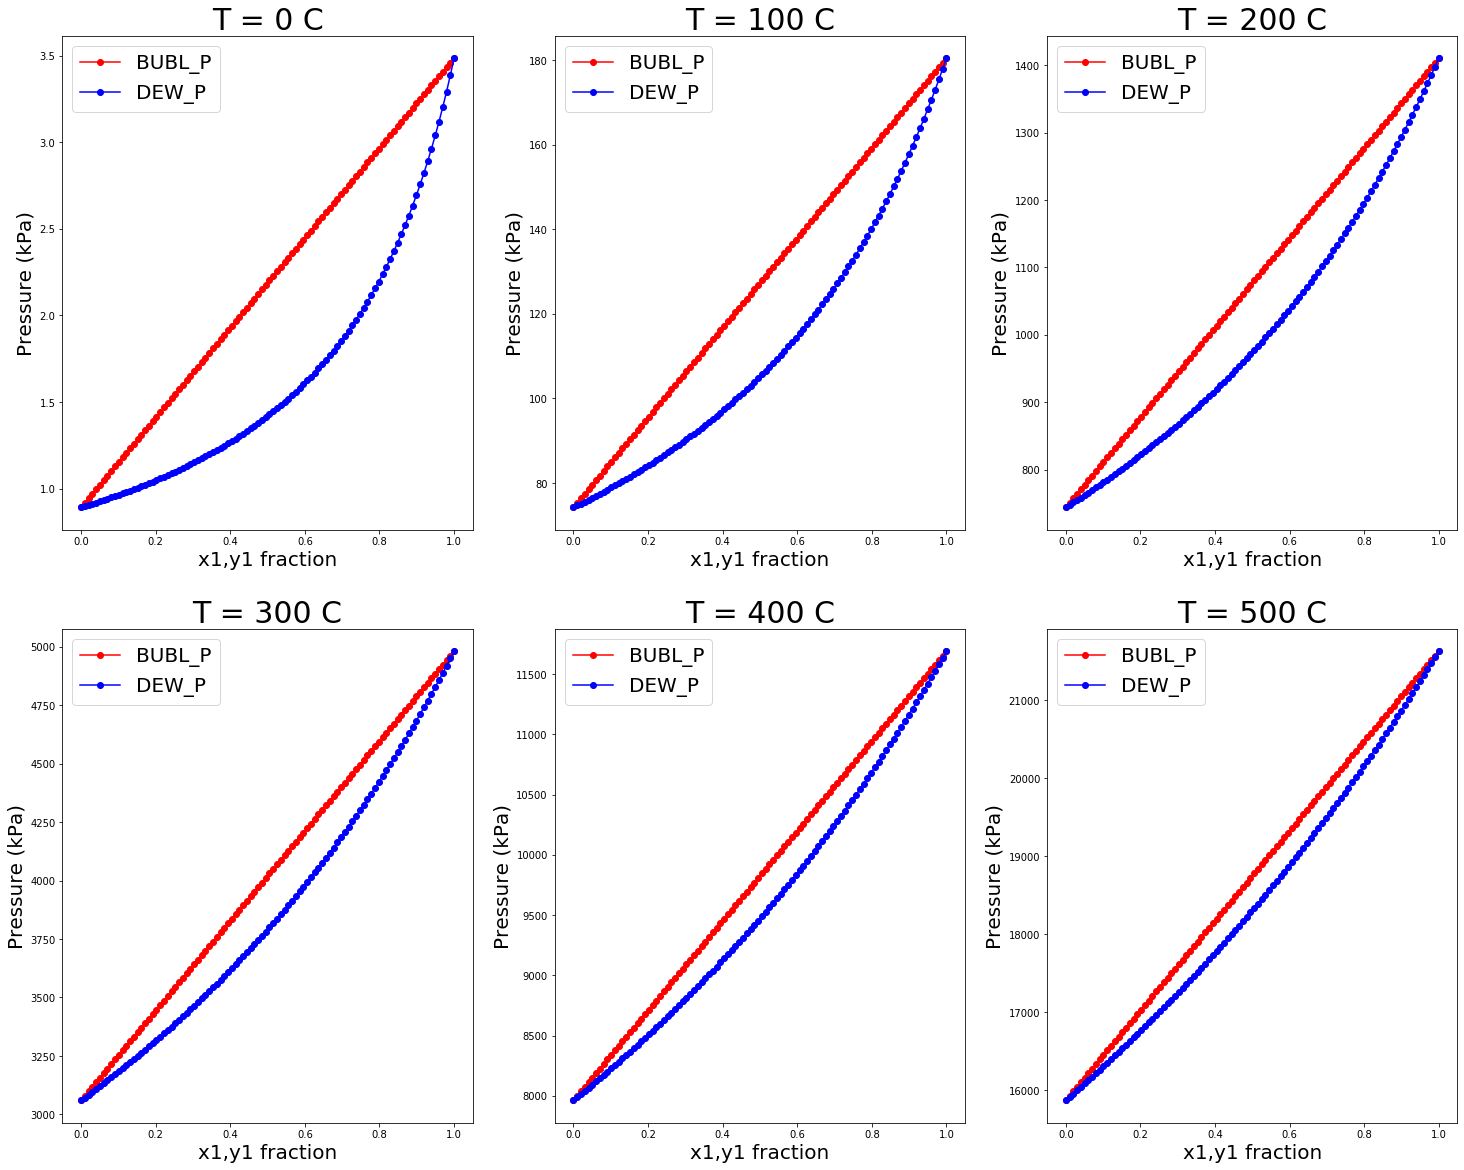

In [18]:
# constant Temperatures list
T_list = [0, 100, 200, 300, 400, 500]

# subplt column and row count
cols = 3
rows = 2

# creating subpolts
fig, ax = plt.subplots(rows, cols, figsize=(25, 20))

# For loop for generating data of every subplt
count = 0
for i in range(rows):
    for j in range(cols):
        T = T_list[count]

        count += 1

        df = P_df(100, T, all_params)

        ax[i, j].plot(df['x1'], df['BUBL_P'], 'ro-', label='BUBL_P')
        ax[i, j].plot(df['x1'], df['DEW_P'], 'bo-', label='DEW_P')
        ax[i, j].set_title("T = {} C".format(T), fontsize=30)
        ax[i, j].set_xlabel("x1,y1 fraction", fontsize=20)
        ax[i, j].set_ylabel("Pressure (kPa)", fontsize=20)
        ax[i, j].legend(fontsize=20)


 ### <h2>Temperature x1, x2, y1, y2  DataFrame</h2>

In [19]:


def T_df(num, P, all_params):
    '''
    num: count of DataFrames rows to generate

    P: Pressure in kPa

    all_params = list of parameters for Antonie equations
    '''
    # creating list of x1 and x2 from 0 to 1.0
    x1 = np.linspace(0, 1, num)
    x2 = 1 - x1

    # Computing BUBL_P and DEW_P lists
    BUBL_T_list = []
    DEW_T_list = []
    Y = []
    for i in range(len(x1)):
        X = [x1[i], x2[i]]
        TB, y = BUBL_T(X, P, all_params)

        TD = DEW_T(X, P, all_params)[0]
        Y.append(y)
        BUBL_T_list.append(TB)
        DEW_T_list.append(TD)

    Y = np.array(Y)

    # Creating DataFrame
    df = pd.DataFrame()

    # Filling DataFrame and labeling
    df['x1'] = x1
    df['x2'] = x2
    df['y1'] = Y[:, 0]
    df['y2'] = Y[:, 1]
    df["BUBL_T"] = BUBL_T_list
    df["DEW_T"] = DEW_T_list

    # Returning DataFrame
    return df



In [20]:
P = 120
df = T_df(20, P, all_params)
df


,x1,x2,y1,y2,BUBL_T,DEW_T
0,0.000000,1.000000,0.000000,1.000000,116.669630,116.669630
1,0.052632,0.947368,0.114365,0.885635,114.224311,115.563647
2,0.105263,0.894737,0.215914,0.784086,111.912396,114.424776
3,0.157895,0.842105,0.306429,0.693571,109.723109,113.250671
4,0.210526,0.789474,0.387407,0.612593,107.646689,112.038710
5,0.263158,0.736842,0.460107,0.539893,105.674301,110.785953
6,0.315789,0.684211,0.525593,0.474407,103.797944,109.489085
7,0.368421,0.631579,0.584770,0.415230,102.010373,108.144344
8,0.421053,0.578947,0.638406,0.361594,100.305019,106.747442
9,0.473684,0.526316,0.687161,0.312839,98.675923,105.293450


 <h2> Ploting Dew Temprature and Buble Temprature at constant Pressure</h2>

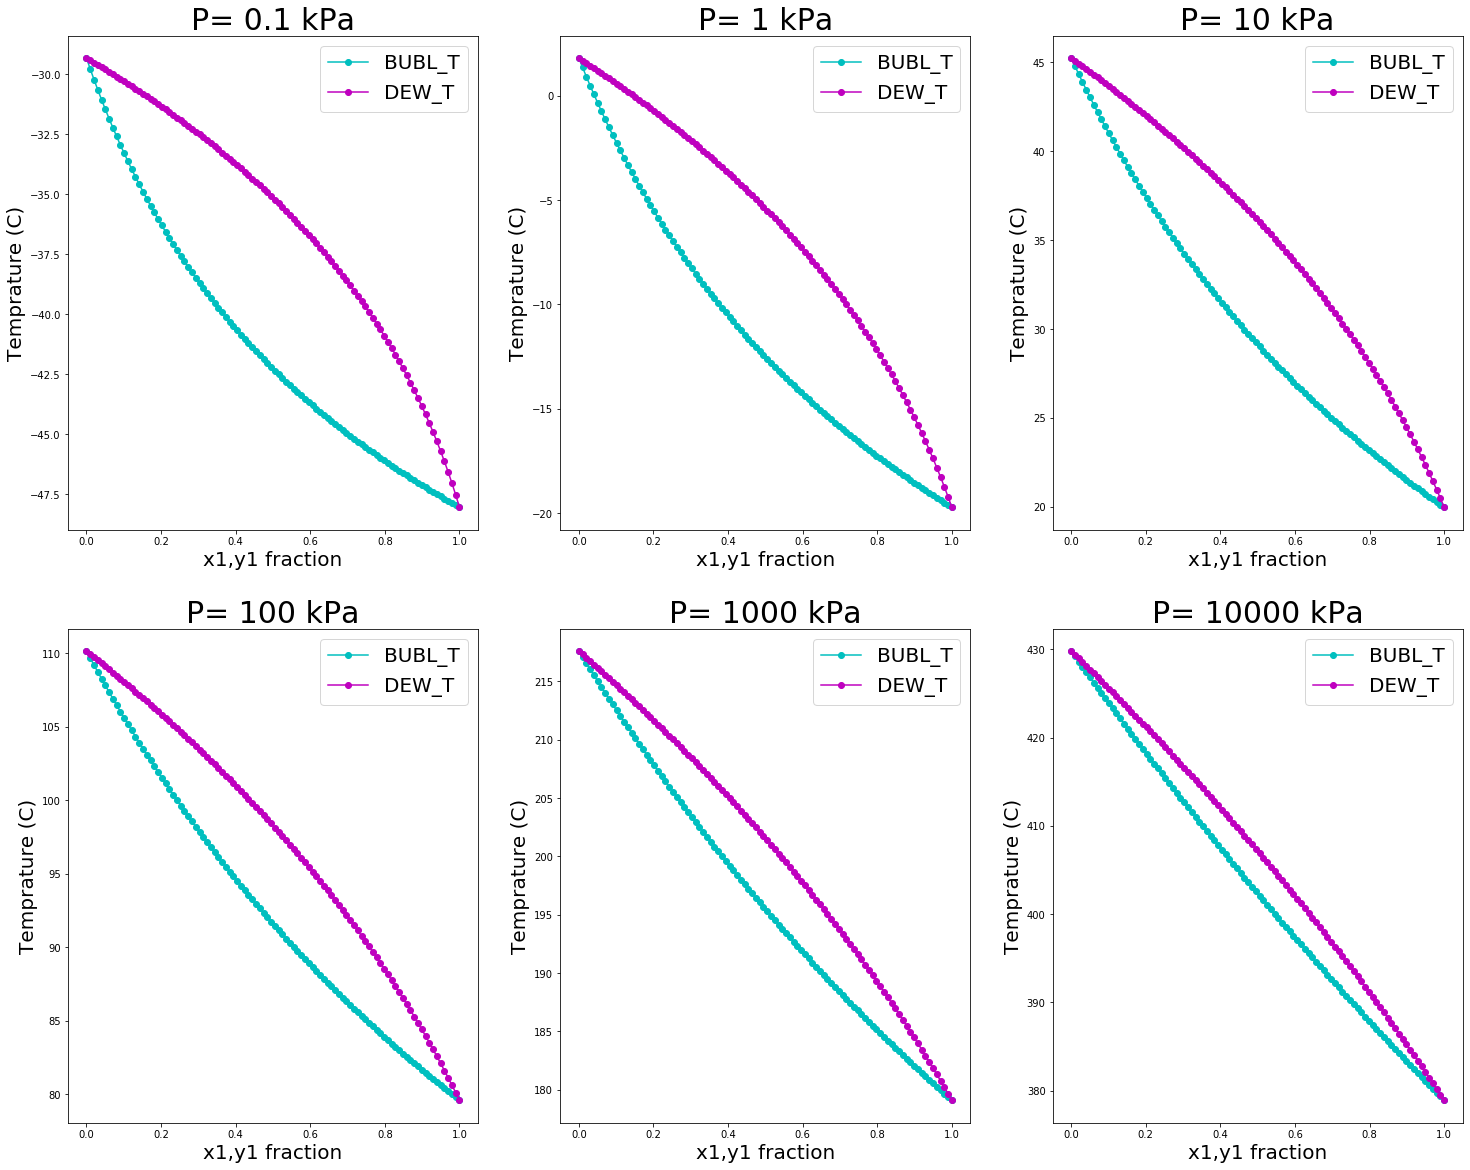

In [21]:
# constant Temperatures list
P_list = [0.1, 1, 10, 100, 1000, 10000]

# subplt column and row count
cols = 3
rows = 2

# creating subpolts
fig, ax = plt.subplots(rows, cols, figsize=(25, 20))

# For loop for generating data of every subplt
count = 0
for i in range(rows):
    for j in range(cols):
        P = P_list[count]

        count += 1

        df = T_df(100, P, all_params)

        ax[i, j].plot(df['x1'], df['BUBL_T'], 'co-', label='BUBL_T')
        ax[i, j].plot(df['x1'], df['DEW_T'], 'mo-', label='DEW_T')
        ax[i, j].set_title("P= {} kPa".format(P), fontsize=30)
        ax[i, j].set_xlabel("x1,y1 fraction", fontsize=20)
        ax[i, j].set_ylabel("Temprature (C)", fontsize=20)
        ax[i, j].legend(fontsize=20)


 ### <h2> 3D Plot of Bubble Pressure and Dew Pressure Subtraction accordint to x1,y1 and Temprature</h2>

Text(0.5, 0, 'Pressure (kPa)')

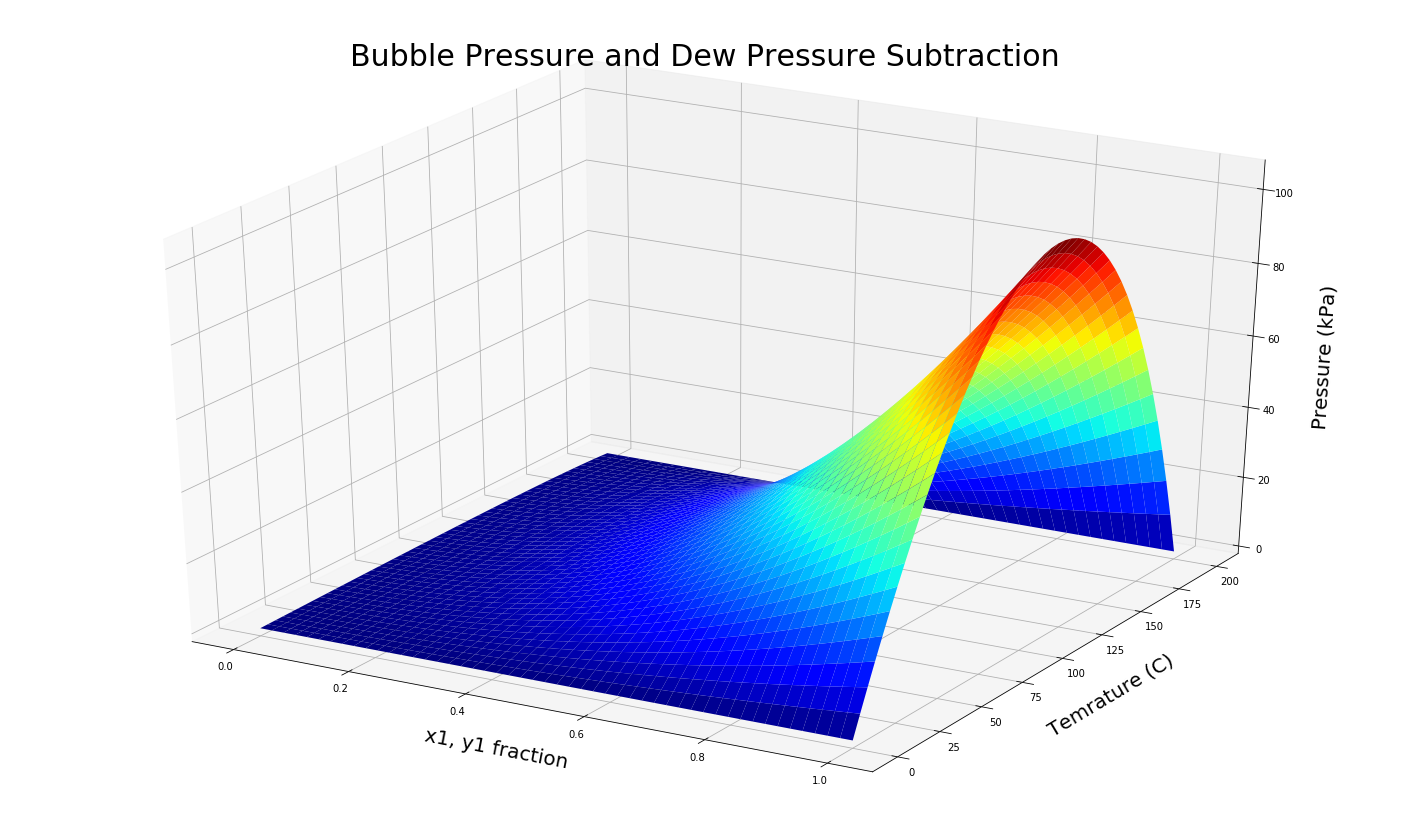

In [22]:
# X1 points count
X_num = 50

# initialize Temperature
Ti = 0

# end Temprature
Te = 200
T_num = 50

# creting Meshgrid
Xv, Tv = np.meshgrid(np.linspace(0, 1, X_num), np.linspace(Ti, Te, T_num))
T = 500


# Computing Bubble Pressure and Dew Pressure list
BP_list = []
DP_list = []

for x1 in np.linspace(0, 1, X_num):
    for T in np.linspace(Ti, Te, T_num):
        BP = BUBL_P([x1, 1-x1], T, all_params)[0]
        DP = DEW_P([x1, 1-x1], T, all_params)[0]
        BP_list.append(BP)
        DP_list.append(DP)

BP_array = np.array(BP_list)
BP_array = BP_array.reshape(X_num, T_num)

DP_array = np.array(DP_list)
DP_array = DP_array.reshape(X_num, T_num)

# Ploting 3D
fig = plt.figure(figsize=(25, 15))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_surface(X=Xv, Y=Tv, Z=BP_array - DP_array, cmap=cm.jet)
ax1.set_title("Bubble Pressure and Dew Pressure Subtraction", fontsize=30)
ax1.set_xlabel("x1, y1 fraction", fontsize=20, labelpad=20)
ax1.set_ylabel("Temrature (C)", fontsize=20, labelpad=20)
ax1.set_zlabel("Pressure (kPa)", fontsize=20, labelpad=20)

